In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,classification_report

# data

In [2]:
np.random.seed(42)

In [3]:
def generate_correlated_clusters(n_samples,n_features,n_clusters,correlation=0.5,random_state=None):

    np.random.seed(random_state)

    X_blobs,y_blobs = make_blobs(n_samples=n_samples,centers=n_clusters,n_features=n_features,random_state=random_state)

    centers = np.array([X_blobs[y_blobs == i].mean(axis=0) for i in range(n_clusters)])

    X,y = [],[]

    for i,center in enumerate(centers):
    
        cov_matrix = np.full((n_features,n_features),correlation)  
        np.fill_diagonal(cov_matrix,1)  

        cluster_samples = np.random.multivariate_normal(mean=center,cov=cov_matrix,size=n_samples // n_clusters)

        X.append(cluster_samples)
        y.append(np.full(n_samples // n_clusters, i)) 

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

In [4]:
X, y = generate_correlated_clusters(n_samples=10000,n_features=10,n_clusters=4,correlation=0.5,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape) 

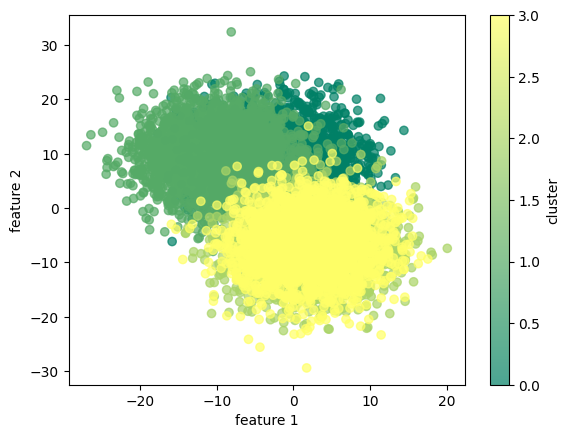

In [96]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
corr_dataset = pd.DataFrame(X) 

In [7]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [8]:
corr_dataset['target'] = y

In [9]:
corr_dataset

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3


In [ ]:
sns.pairplot(corr_dataset)

## correlation matrix

In [10]:
corr_dataset.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.496237,-0.458427,0.331141,0.382998,0.452095,-0.040003,-0.178527,0.215476,-0.046239
vab_2,-0.496237,1.000000,0.632045,-0.275589,-0.535455,-0.646682,-0.090137,0.432263,-0.183275,0.317416
vab_3,-0.458427,0.632045,1.000000,-0.384865,-0.558911,-0.576824,-0.080788,0.443947,-0.199325,0.169089
vab_4,0.331141,-0.275589,-0.384865,1.000000,0.469898,0.272733,0.007909,-0.271322,0.230835,0.260557
vab_5,0.382998,-0.535455,-0.558911,0.469898,1.000000,0.530453,0.151339,-0.511727,0.222369,-0.057520
vab_6,0.452095,-0.646682,-0.576824,0.272733,0.530453,1.000000,0.122048,-0.410463,0.183357,-0.280502
vab_7,-0.040003,-0.090137,-0.080788,0.007909,0.151339,0.122048,1.000000,-0.209025,-0.001482,-0.122352
vab_8,-0.178527,0.432263,0.443947,-0.271322,-0.511727,-0.410463,-0.209025,1.000000,-0.086531,0.172325
vab_9,0.215476,-0.183275,-0.199325,0.230835,0.222369,0.183357,-0.001482,-0.086531,1.000000,0.083413
vab_10,-0.046239,0.317416,0.169089,0.260557,-0.057520,-0.280502,-0.122352,0.172325,0.083413,1.000000


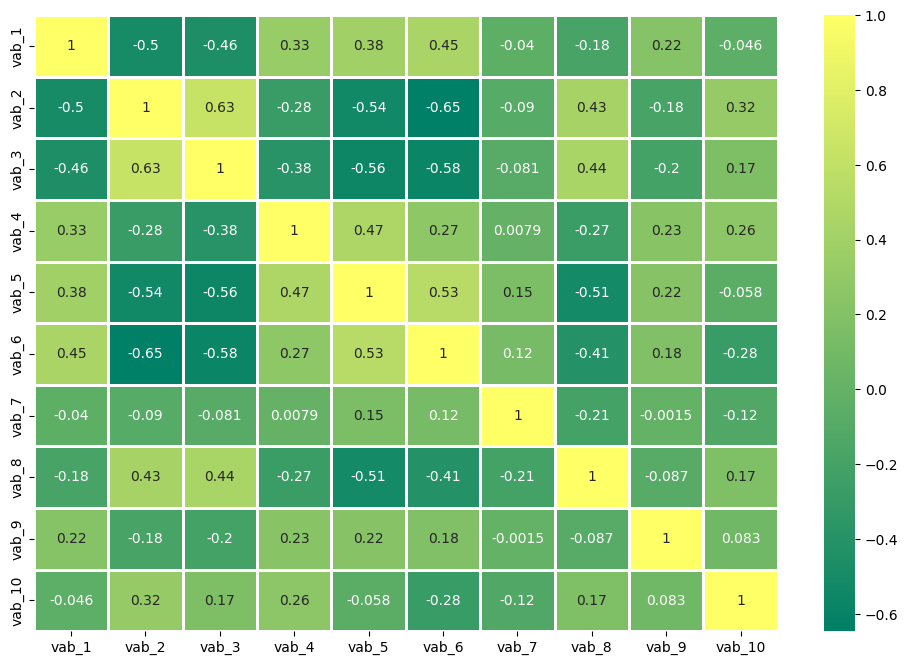

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='summer',annot=True,linewidths=1)
plt.show()

### data standardization

In [12]:
X_values = corr_dataset.iloc[:,:-1].values

In [13]:
y_values = corr_dataset.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_values = scaler.fit_transform(X_values)

In [17]:
np.mean(X_values),np.std(X_values)

(-1.8758328224066645e-16, 0.9999999999999994)

In [18]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.579199,0.221173,0.948044,-0.113293,-0.964991,-0.920642,-0.825879,-0.215462,1.188291,1.787054
1,-0.188848,1.360312,0.449073,-0.543808,-0.760213,-1.434034,0.295837,0.554496,-1.180624,-1.651551
2,-0.355979,0.891803,1.341894,-1.218512,-0.253479,-1.159207,-0.736188,0.788288,-0.043506,-0.694779
3,0.661262,1.142016,1.281611,0.460251,-0.751342,-1.677700,0.017256,1.011960,0.139065,1.494045
4,-0.182857,0.592485,-0.225710,0.078054,-0.006180,-1.526876,0.370763,1.487099,-1.567002,1.229058
...,...,...,...,...,...,...,...,...,...,...
9995,-0.305971,-1.266146,-0.043241,1.067173,1.646975,0.790189,-0.420256,-1.581140,-0.197830,-0.904892
9996,0.991505,-1.023516,-1.995966,0.476324,0.405791,1.439379,0.874075,-0.467688,1.013431,0.301579
9997,1.096283,-1.490069,-0.987900,1.655200,1.731391,0.862186,-0.385046,-0.883554,0.423072,0.417228
9998,-0.115814,-0.933825,-0.400807,1.523938,2.158101,0.902595,0.255634,-1.726180,-0.119175,0.342328


<Axes: ylabel='Density'>

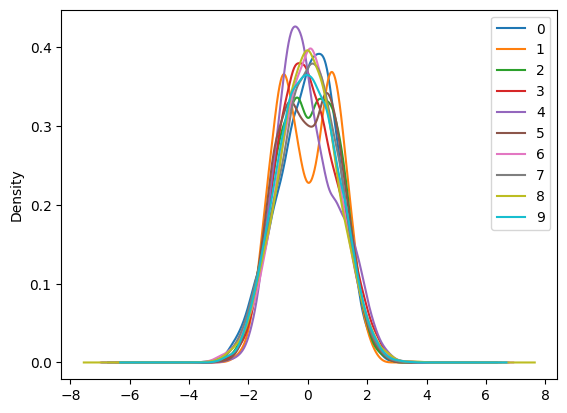

In [19]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca_general = PCA()

In [22]:
pca_general.fit(X_values)

PCA()

In [23]:
explained_variance = pca_general.explained_variance_ratio_

In [24]:
explained_variance

array([0.38465288, 0.14519758, 0.10735663, 0.08636534, 0.0705437 ,
       0.04827768, 0.04519634, 0.04155586, 0.03835558, 0.03249841])

In [25]:
eigenvalues = pca_general.explained_variance_

In [26]:
pd.DataFrame(eigenvalues)

,0
0,3.846914
1,1.452121
2,1.073674
3,0.863740
4,0.705508
5,0.482825
6,0.452009
7,0.415600
8,0.383594
9,0.325017


In [27]:
eigenvectors = pca_general.components_

### scree plot

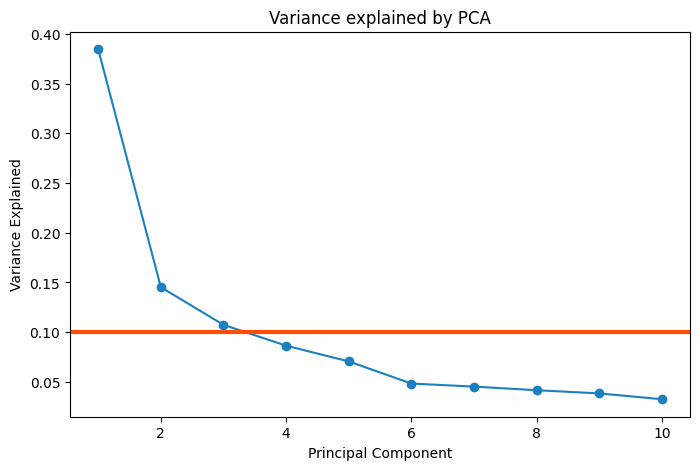

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [29]:
pca = PCA(n_components=2)

In [30]:
principal_components = pca.fit_transform(X_values)

In [31]:
pd.DataFrame(principal_components).head(8)

,0,1
0,1.103225,1.943213
1,1.999613,-1.443535
2,2.187499,-0.493495
3,2.123429,1.899798
4,1.661772,0.721056
5,1.898829,2.188015
6,2.285330,-0.020592
7,1.055331,2.084141


In [32]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [33]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [34]:
final_df

,principal component 1,principal component 2,target
0,1.103225,1.943213,0
1,1.999613,-1.443535,0
2,2.187499,-0.493495,0
3,2.123429,1.899798,0
4,1.661772,0.721056,0
...,...,...,...
9995,-2.264408,-0.477480,3
9996,-2.805555,0.264503,3
9997,-3.148746,1.193298,3
9998,-2.682585,0.491445,3


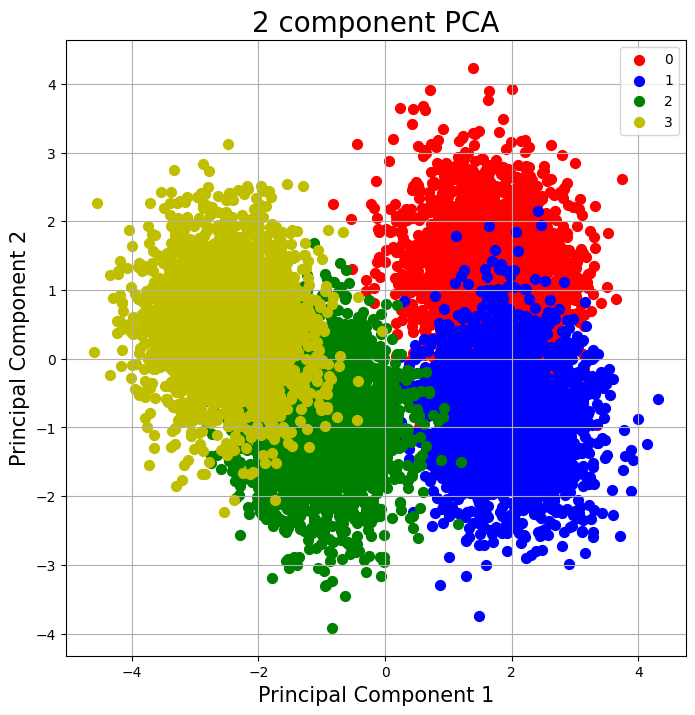

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

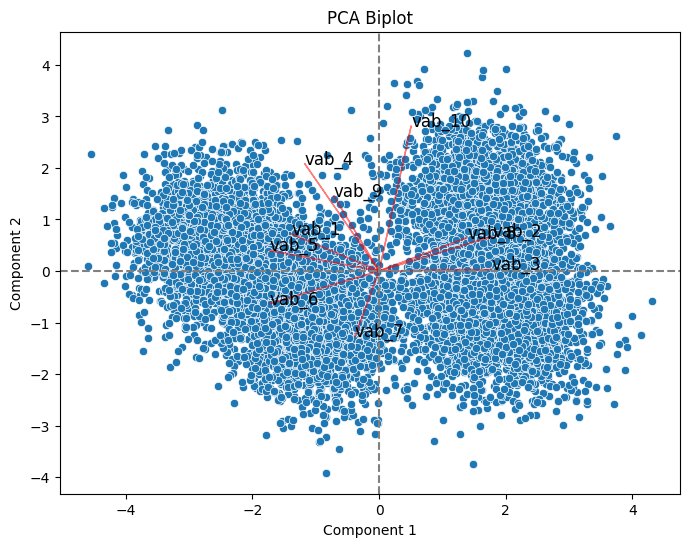

In [36]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

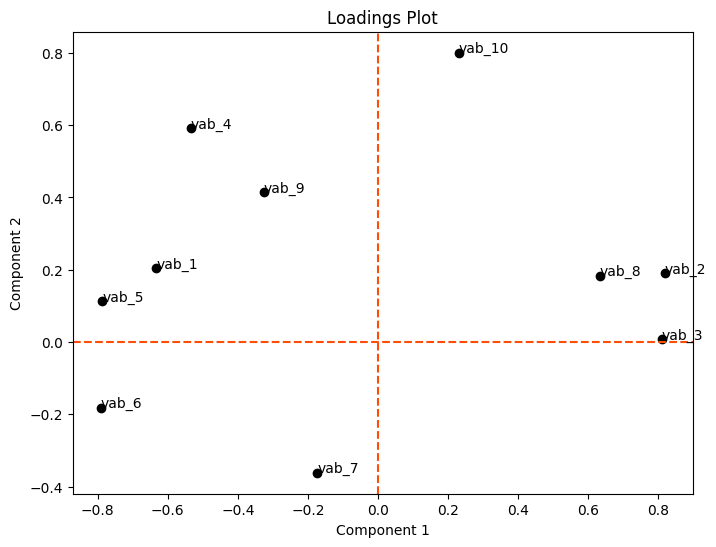

In [37]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [38]:
scores_pca = pca.transform(X_values)

In [39]:
pd.DataFrame(scores_pca).head()

,0,1
0,1.103225,1.943213
1,1.999613,-1.443535
2,2.187499,-0.493495
3,2.123429,1.899798
4,1.661772,0.721056


## t-SNE

In [40]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(n_components=2,random_state=42)

In [42]:
X_tsne = tsne.fit_transform(X_values)

In [43]:
tsne_data = np.vstack((X_tsne.T,corr_dataset['target'])).T

In [44]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [45]:
tsne_df

,dim_1,dim_2,target
0,33.416496,32.270012,0.0
1,21.032103,-47.053978,0.0
2,33.344269,-19.589006,0.0
3,34.899708,24.471287,0.0
4,63.431477,12.277533,0.0
...,...,...,...
9995,-45.691650,7.758394,3.0
9996,-82.462608,3.393646,3.0
9997,-63.531582,-0.446913,3.0
9998,-65.948143,-19.933033,3.0


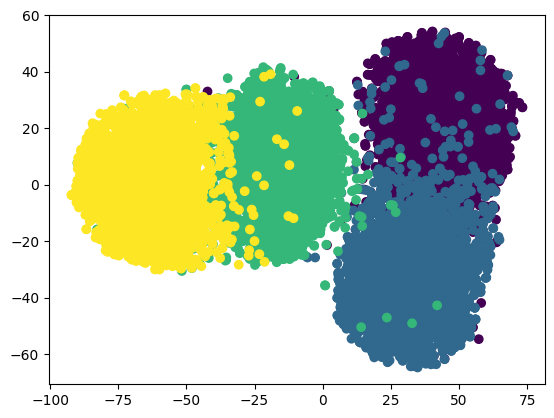

In [46]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [47]:
tsne.kl_divergence_

2.7065045833587646

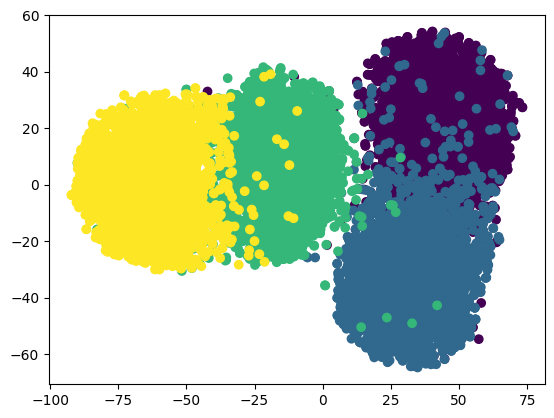

In [48]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [49]:
from sklearn.cluster import KMeans

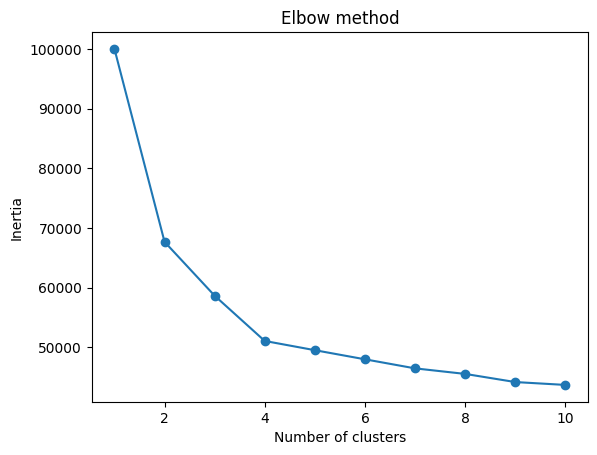

In [50]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4,init='k-means++')

In [52]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [53]:
corr_dataset['k_means'] = kmeans.labels_

In [54]:
corr_dataset

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,3
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,0
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,0
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,3
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,2
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,2
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,2
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,2


In [55]:
from scipy.optimize import linear_sum_assignment

y_true = corr_dataset['target'].values  
y_kmeans = corr_dataset['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
corr_dataset['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(corr_dataset['k_means'] == y_true))

accuracy before: 0.0244
accuracy after: 0.9512


In [56]:
corr_dataset

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,0
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,1
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,1
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,0
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,3
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,3
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,3
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,3


In [57]:
print(np.unique(corr_dataset['target']))

[0 1 2 3]


In [58]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


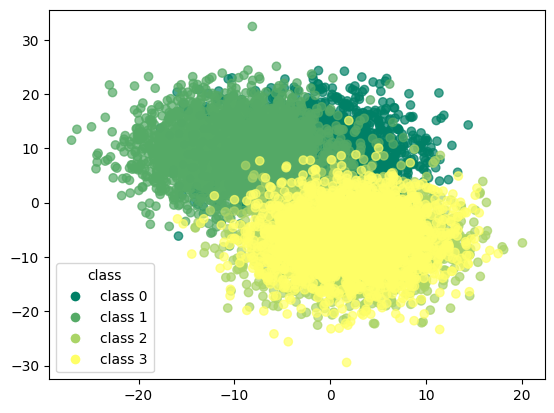

In [59]:
from matplotlib.lines import Line2D

scatter = plt.scatter(corr_dataset.iloc[:, 0], corr_dataset.iloc[:, 1], 
                      c=corr_dataset['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(corr_dataset['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

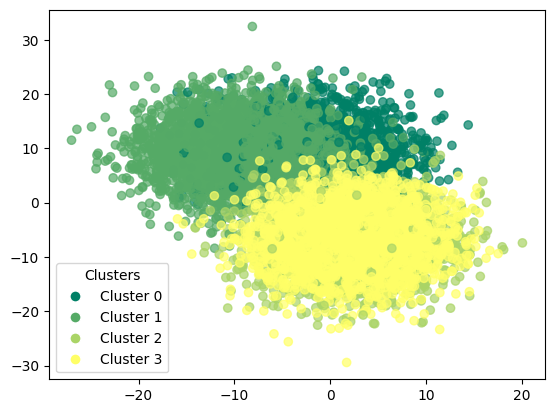

In [60]:
scatter = plt.scatter(corr_dataset.iloc[:, 0], corr_dataset.iloc[:, 1], 
                      c=corr_dataset['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(corr_dataset['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [61]:
kmeans.cluster_centers_

array([[-1.11434251,  0.8590381 ,  0.87282401, -0.83349415, -0.62713605,
        -0.74587974,  0.38044204,  0.07873796, -0.55846838, -0.24278331],
       [ 0.60166505, -0.86285799, -0.48438611, -0.44496541,  0.02651305,
         0.73925097, -0.07387866,  0.0512201 ,  0.00973744, -0.94127396],
       [ 0.57498298, -0.82410765, -1.01329078,  1.12176339,  1.2766965 ,
         0.80854799,  0.3306509 , -1.09752003,  0.44580407,  0.20993699],
       [-0.04538766,  0.82554739,  0.61753457,  0.17758442, -0.67090109,
        -0.80062633, -0.6505756 ,  0.97548849,  0.11477844,  0.99521896]])

In [62]:
print(confusion_matrix(corr_dataset['target'],corr_dataset['k_means']))

[[2323  169    8    0]
 [ 140 2350   10    0]
 [   5   16 2414   65]
 [   0    0   75 2425]]


In [63]:
print(classification_report(corr_dataset['target'],corr_dataset['k_means']))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2500
           1       0.93      0.94      0.93      2500
           2       0.96      0.97      0.96      2500
           3       0.97      0.97      0.97      2500

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### clustering with pca

In [64]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

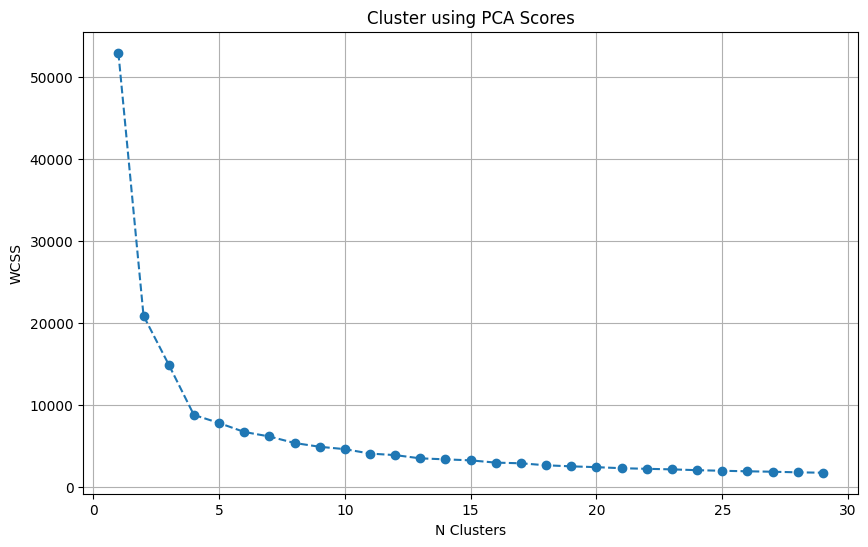

In [65]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o",linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [66]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [67]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [68]:
df_pca_kmeans = corr_dataset.copy()

In [69]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [70]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,0,0
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,1,2
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,1,2
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,0,0
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,3,3
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,3,3
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,3,3
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,3,3


In [71]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.4634
accuracy after: 0.9111


In [72]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,0,0
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,1,1
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,1,1
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,0,0
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,3,3
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,3,3
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,3,3
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,3,3


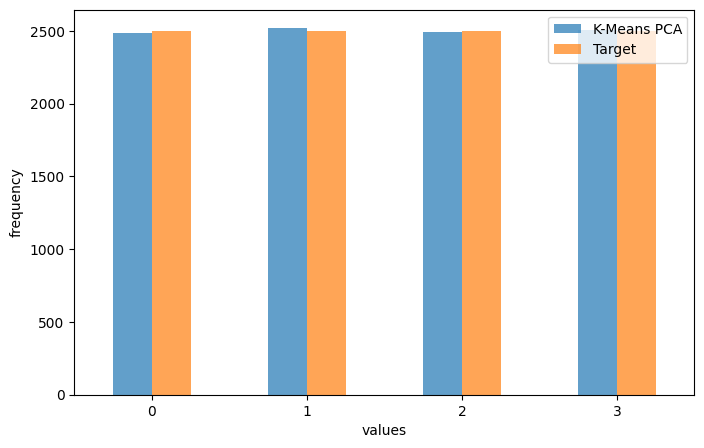

In [73]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [74]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2274  220    4    2]
 [ 206 2268   26    0]
 [   4   31 2266  199]
 [   0    0  197 2303]]


In [75]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2500
           1       0.90      0.91      0.90      2500
           2       0.91      0.91      0.91      2500
           3       0.92      0.92      0.92      2500

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



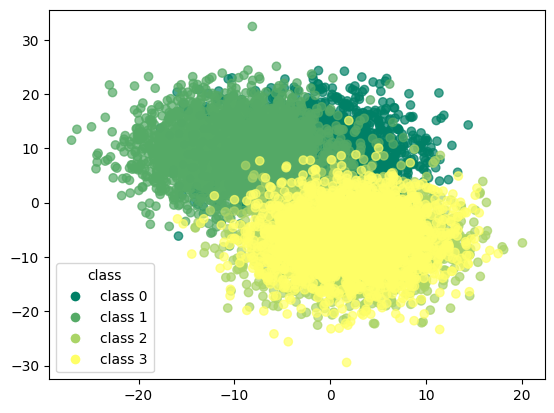

In [76]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

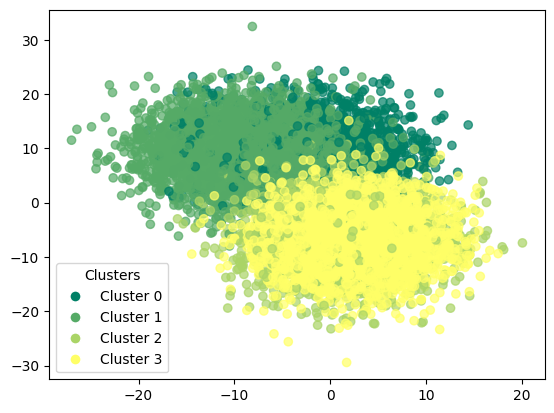

In [77]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

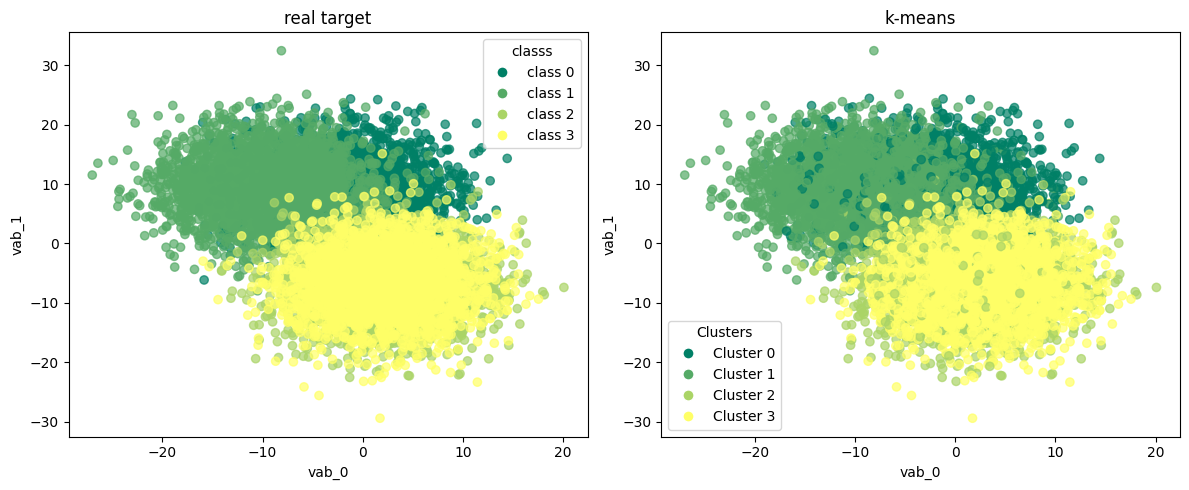

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

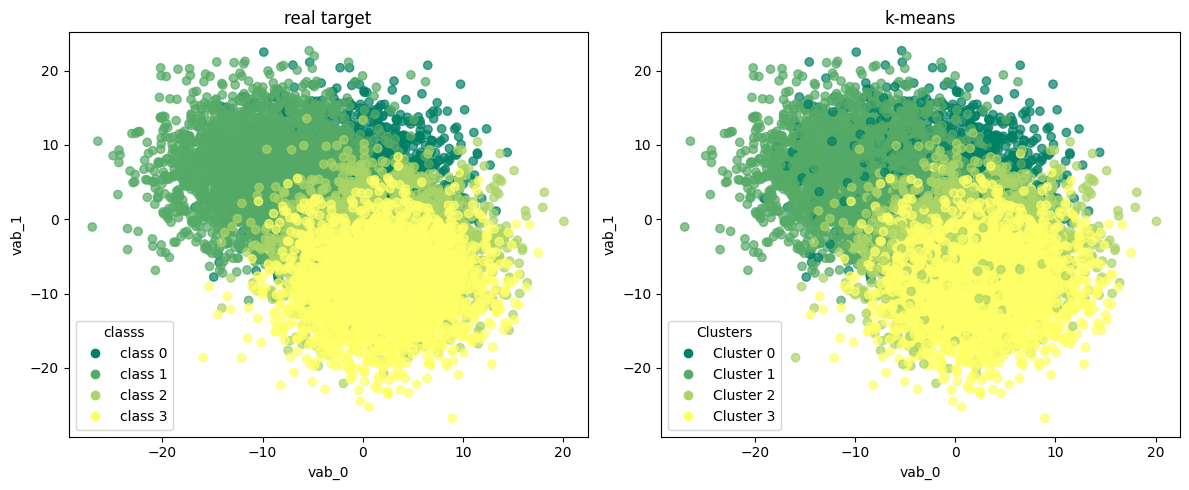

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

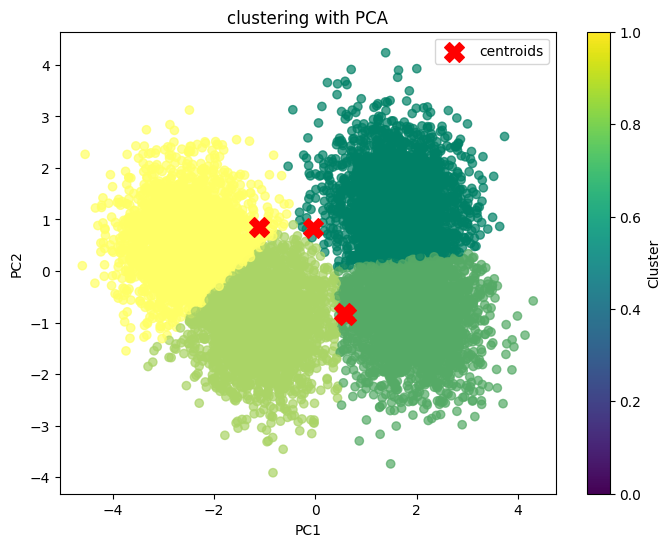

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

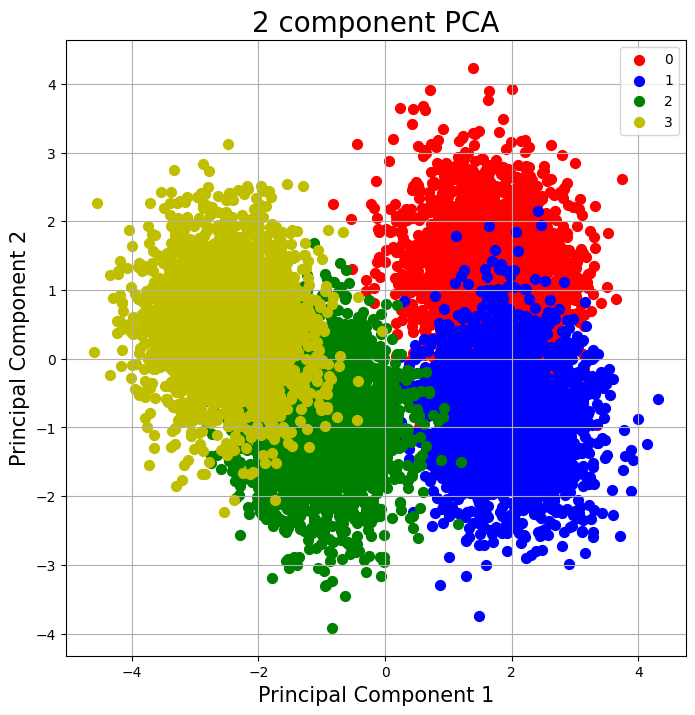

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [82]:
kmeans_tsne = KMeans(n_clusters=4,init='k-means++')

In [83]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=4)

In [84]:
df_tsne_kmeans = corr_dataset.copy()

In [85]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [86]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,0,1
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,1,0
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,1,0
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,0,1
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,3,2
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,3,2
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,3,2
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,3,2


In [87]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.0535
accuracy after: 0.9416


In [88]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,2.152907,3.363712,7.297424,-0.304553,-9.089200,-7.971281,-10.107699,-1.641607,8.098374,9.914503,0,0,0
1,-3.239266,14.246814,3.244360,-3.553944,-7.402009,-12.155100,-3.983127,4.112045,-4.823593,-14.109652,0,1,1
2,-4.412634,9.770782,10.496606,-8.646392,-3.226965,-9.915431,-9.617991,5.859102,1.379161,-7.425071,0,1,1
3,2.729046,12.161264,10.006937,4.024378,-7.328917,-14.140822,-5.504178,7.530538,2.375050,7.867369,0,0,0
4,-3.197207,6.911152,-2.236799,1.139676,-1.189430,-12.911700,-3.574030,11.081099,-6.931212,6.016006,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.061543,-10.845830,-0.754630,8.605232,12.431129,5.970912,-7.892999,-11.846899,0.537355,-8.893043,3,3,3
9996,5.047555,-8.527798,-16.616328,4.145688,2.204854,11.261399,-0.825945,-3.526419,7.144548,-0.463912,3,3,3
9997,5.783163,-12.985150,-8.427959,13.043474,13.126643,6.557641,-7.700752,-6.634059,3.924253,0.344081,3,3,3
9998,-2.726523,-7.670905,-3.659086,12.052745,16.642366,6.886952,-4.202636,-12.930742,0.966402,-0.179221,3,3,3


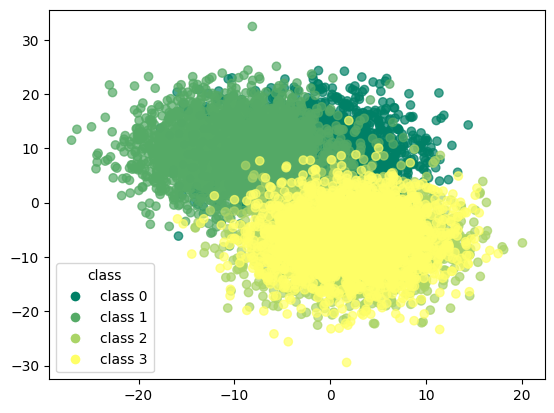

In [89]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

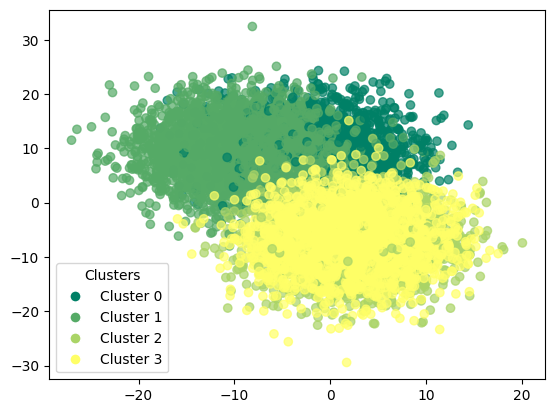

In [90]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

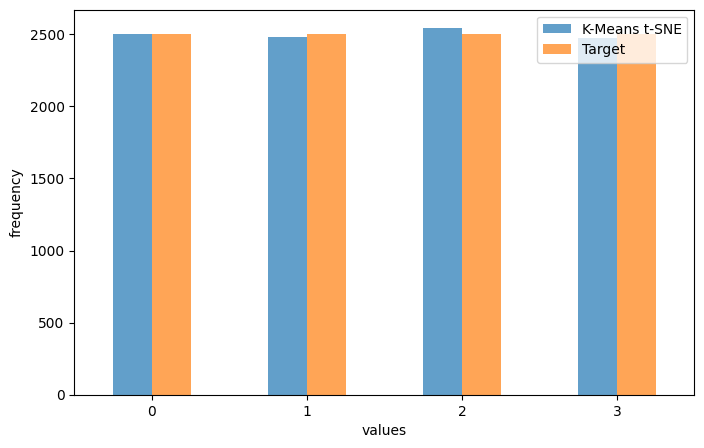

In [91]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [92]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2319  165   16    0]
 [ 184 2299   17    0]
 [   2   14 2404   80]
 [   0    0  106 2394]]


# overall results

In [93]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2500
           1       0.93      0.92      0.92      2500
           2       0.95      0.96      0.95      2500
           3       0.97      0.96      0.96      2500

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [94]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2500
           1       0.90      0.91      0.90      2500
           2       0.91      0.91      0.91      2500
           3       0.92      0.92      0.92      2500

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [95]:
print(classification_report(corr_dataset['target'],corr_dataset['k_means']))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2500
           1       0.93      0.94      0.93      2500
           2       0.96      0.97      0.96      2500
           3       0.97      0.97      0.97      2500

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

